Задание 1.
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [303]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [304]:
def regression(x, y):
    b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x)**2)
    a = np.mean(y) - b * np.mean(x)
    return a, b

In [305]:
def middle_square_error(y, y_hat):
    return ((y - y_hat)**2).sum() / len(y)

In [306]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [307]:
a, b = regression(zp, ks)

In [308]:
a

444.1773573243596

In [309]:
b

2.620538882402765

In [310]:
y_hat = np.round(a + b * zp)
y_hat

array([536., 562., 942., 968., 549., 628., 586., 837., 759., 732.])

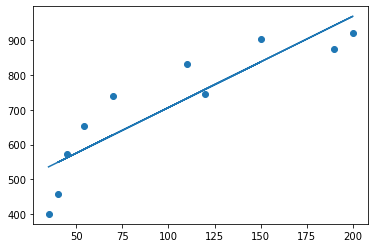

In [311]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

In [312]:
mse = middle_square_error(ks, y_hat)
mse

6469.8

Без интерсепта.

In [313]:
def matrix_b(X, Y):
    return np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ Y)

In [314]:
X = zp.reshape(10, 1)
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [315]:
Y = ks.reshape(10, 1)
Y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [316]:
b = np.round(matrix_b(X, Y), 2)[0]
b

array([5.89])

In [317]:
y_hat = np.round(b * zp)
y_hat

array([ 206.,  265., 1119., 1178.,  236.,  412.,  318.,  884.,  707.,
        648.])

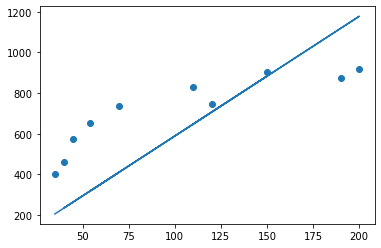

In [318]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

In [319]:
mse = middle_square_error(ks, y_hat)
mse

56519.6

Задание 2.
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [320]:
alfa = 1e-10
b = 0.8

In [321]:
for i in range(10000):
    b -= alfa * (2 / len(zp)) * np.sum((b * zp - ks) * ks)
    mse = middle_square_error(ks, b * ks)
    if i % 100 == 0:
        print(f'Iteration={i}     b={b}     mse={mse}')

Iteration=0     b=0.8000939027080001     mse=21357.007059170774
Iteration=100     b=0.8094764820080224     mse=19399.2747580297
Iteration=200     b=0.818843847164252     mse=17538.582426098023
Iteration=300     b=0.8281960228468963     mse=15774.468545386171
Iteration=400     b=0.8375330336861582     mse=14106.473331895735
Iteration=500     b=0.8468549042723023     mse=12534.138729613478
Iteration=600     b=0.85616165915572     mse=11057.008404525957
Iteration=700     b=0.8654533228469914     mse=9674.627738654426
Iteration=800     b=0.8747299198169545     mse=8386.543824108627
Iteration=900     b=0.8839914744967655     mse=7192.30545716177
Iteration=1000     b=0.893238011277966     mse=6091.463132344404
Iteration=1100     b=0.9024695545125441     mse=5083.569036558714
Iteration=1200     b=0.911686128513001     mse=4168.177043211881
Iteration=1300     b=0.920887757552416     mse=3344.8427063693357
Iteration=1400     b=0.9300744658645074     mse=2613.123254927899
Iteration=1500     b=0.

На 2200-й итерации при b = 1.003 мы имеем наименьшую среднеквадратичную ошибку mse = 4.919.

In [322]:
b = 1.003

In [323]:
y_hat = np.round(b * zp)
y_hat

array([ 35.,  45., 191., 201.,  40.,  70.,  54., 150., 120., 110.])

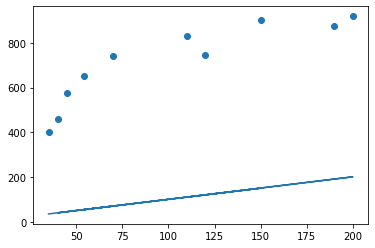

In [324]:
plt.scatter(zp, ks)
plt.plot(zp, y_hat)
plt.show()

In [325]:
mse = middle_square_error(ks, y_hat)
mse

385639.7

Не понял я этого метода.